<a href="https://colab.research.google.com/github/UtkarshAIITB/DAV-Team-Assignment/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the dataset

In [ ]:
flight = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAV_assignment/flight_delays_train.csv')
flight.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [ ]:
flight.shape

(100000, 9)

In [ ]:
flight['Month'].unique()

array(['c-8', 'c-4', 'c-9', 'c-11', 'c-10', 'c-1', 'c-7', 'c-6', 'c-5',
       'c-3', 'c-12', 'c-2'], dtype=object)

In [ ]:
flight['DayOfWeek'].unique()

array(['c-7', 'c-3', 'c-5', 'c-6', 'c-4', 'c-2', 'c-1'], dtype=object)

In [ ]:
print(len(flight['Origin'].unique()))
print(len(flight['Dest'].unique()))
print(len(flight['UniqueCarrier'].unique()))

289
289
22


In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [ ]:
flight['dep_delayed_15min'].value_counts()

N    80956
Y    19044
Name: dep_delayed_15min, dtype: int64

## Label Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder_df = pd.DataFrame(encoder.fit_transform(flight[['dep_delayed_15min']]).toarray())
flight_f = flight.join(encoder_df)
flight_f = flight_f.drop(columns = 0)
flight_f.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,1
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,0.0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,0.0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,0.0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,0.0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,1.0


In [ ]:
# flight_f.columns
flight_f.rename(columns = {1:'Y'}, inplace = True)
# 0 = N(no delay) , 1 = Y(delayed)

In [ ]:
flight_f.drop(columns = 'dep_delayed_15min', inplace = True)
flight_f.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Y
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,0.0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,0.0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,0.0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,0.0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1.0


In [ ]:
flight_f['Month'] = flight_f['Month'].str.replace('c-', '')
flight_f['DayofMonth'] = flight_f['DayofMonth'].str.replace('c-', '')
flight_f['DayOfWeek'] = flight_f['DayOfWeek'].str.replace('c-', '')
flight_f.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Y
0,8,21,7,1934,AA,ATL,DFW,732,0.0
1,4,20,3,1548,US,PIT,MCO,834,0.0
2,9,2,5,1422,XE,RDU,CLE,416,0.0
3,11,25,6,1015,OO,DEN,MEM,872,0.0
4,10,7,6,1828,WN,MDW,OMA,423,1.0


In [ ]:
# flight_f[flight_f['Dest'] == 'TTN']

Just using label encoder on the two columns of origin and dest will lead to different encoding of the same keys in origin and dest since the dest has two different values which aren't preseent in origin. So, two make the encoding same in both cases, preprocessing was done by removing rows of indexes 29073, 59948, 88740.

In [ ]:
# df.drop([5,6], axis=0, inplace=True)
flight_f.drop([29073, 59948, 88740], axis = 0, inplace = True)
flight_f = flight_f.reset_index(drop = True)

In [ ]:
# flight_f['Month'].loc[0]
label_encoder = LabelEncoder()
# flight_f['UniqueCarrier'] = label_encoder.fit(flight_f['UniqueCarrier'])
# flight_f['Origin'] = label_encoder.fit(flight_f['Origin'])
# flight_f['Dest'] = label_encoder.fit(flight_f['Dest'])
# df.apply(LabelEncoder().fit)
label_encoder.fit(flight_f['Origin'])
# label_encoder.fit(flight_f['Origin'])
org = label_encoder.transform(flight_f['Origin'])
des = label_encoder.transform(flight_f['Dest'])
# flight_f.head()

In [ ]:
flight_f['Origin_t'] = org
flight_f['Dest_t'] = des
flight_f.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Y,Origin_t,Dest_t
0,8,21,7,1934,AA,ATL,DFW,732,0.0,18,79
1,4,20,3,1548,US,PIT,MCO,834,0.0,217,172
2,9,2,5,1422,XE,RDU,CLE,416,0.0,228,60
3,11,25,6,1015,OO,DEN,MEM,872,0.0,78,176
4,10,7,6,1828,WN,MDW,OMA,423,1.0,174,201


In [ ]:
le = LabelEncoder()
flight_f['UniqueCarrier'] = le.fit_transform(flight_f['UniqueCarrier'])

In [ ]:
flight_f = flight_f.drop(columns = ['Origin', 'Dest'])

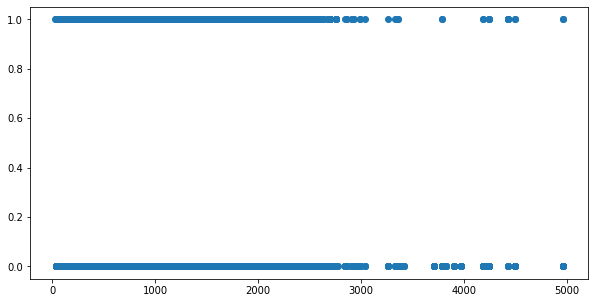

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(flight_f['Distance'], flight_f['Y'])

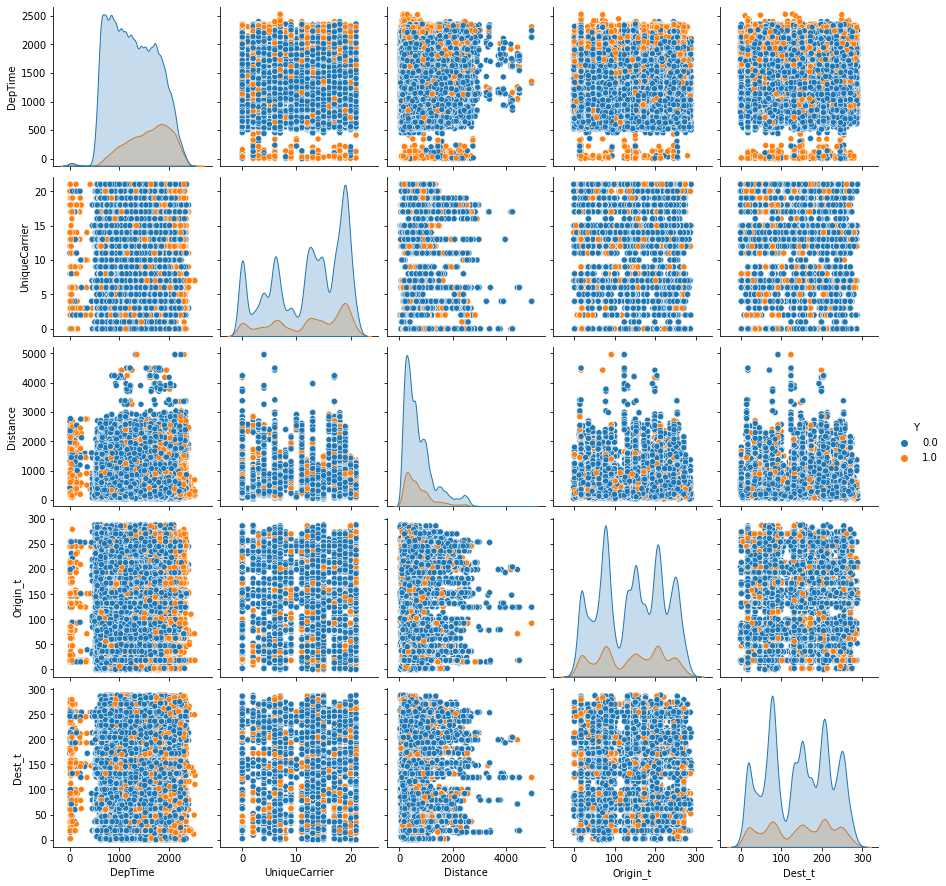

In [ ]:
sns.pairplot(flight_f, hue = 'Y')

Since, the classification is highly intervined, it is unlikely that logistic regression (linear classification) will provide better scores. Though it may be separable with higher dimensions at work. Therefore, we need to apply more robust classification methods such as RandomForest. K-means wont work too, would lead out lot of clusters.

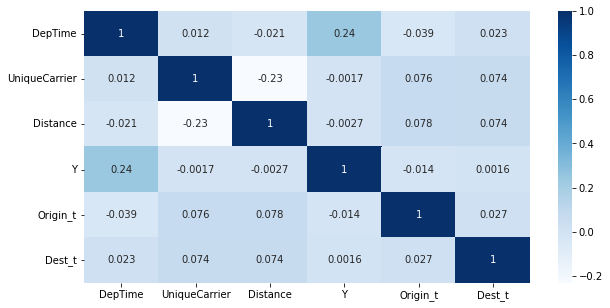

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(flight_f.corr(),cmap='Blues',annot=True)

## Reading the test set

In [ ]:
flight_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAV_assignment/flight_delays_test.csv')
flight_test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# encoder_df = pd.DataFrame(encoder.fit_transform(flight[['dep_delayed_15min']]).toarray())
# test = flight_test.join(encoder_df)
# test = test.drop(columns = 0)
# test.head()

In [ ]:
# test.rename(columns = {1:'Y'}, inplace = True)
# # 0 = N(no delay) , 1 = Y(delayed)
# test.drop(columns = 'dep_delayed_15min', inplace = True)
# test.head()

In [ ]:
flight_test.shape

(100000, 8)

In [ ]:
lol = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAV_assignment/sample_sub1.csv')
lol.head()

,id,dep_delayed_15min
0,0,0.081
1,1,0.387
2,2,0.069
3,3,0.177
4,4,0.732


In [ ]:
lol.shape

(100000, 2)

## Predictive Analysis

In [ ]:
# flight_f
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
y = flight_f['Y']
X = flight_f.drop(columns = 'Y')

## Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

81.26


## Naive-Bayes

In [ ]:
pipe = make_pipeline(StandardScaler(), GaussianNB())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [ ]:
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

81.27


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
pipeline = Pipeline([
        ("standard_scaler",StandardScaler()),
        ("kmeans", KMeans(n_clusters=5, max_iter=10000)),
        ("log_reg", LogisticRegression()),
    ])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.8126


In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = dict(kmeans__n_clusters=range(2, 100))

cluster grid_search CV doesn't seem to make improvements in accuracy score.

In [ ]:
pipeline = Pipeline([
        ("standard_scaler",StandardScaler()),
        ("kmeans", KMeans(n_clusters=10, max_iter=10000)),
        ("log_reg", GaussianNB()),
    ])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.8126


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline = Pipeline([
        ("standard_scaler",StandardScaler()),
        ("random_forest", RandomForestClassifier(max_depth = 20)),
    ])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.82285


## Neural Networks

In [ ]:
# !pip install tensorflow==2.7.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 1)

In [ ]:
X_test = X_test.astype('float')
X_train = X_train.astype('float')
X_val = X_val.astype('float')

In [ ]:
X_train_t = sc.fit_transform(X_train)
X_test_t = sc.fit_transform(X_test)
X_val_t = sc.fit_transform(X_val)

In [ ]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history= model.fit(x=X_train_t, y=y_train, epochs=150, 
          validation_data=(X_val_t,y_val))

Epoch 1/150
2000/2000 [==============================] - 10s 4ms/step - loss: 0.4822 - accuracy: 0.8087 - val_loss: 0.4724 - val_accuracy: 0.8058
Epoch 2/150
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4663 - accuracy: 0.8093 - val_loss: 0.4658 - val_accuracy: 0.8058
Epoch 3/150
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4648 - accuracy: 0.8090 - val_loss: 0.4667 - val_accuracy: 0.8058
Epoch 4/150
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4642 - accuracy: 0.8091 - val_loss: 0.4668 - val_accuracy: 0.8058
Epoch 5/150
2000/2000 [==============================] - 9s 5ms/step - loss: 0.4638 - accuracy: 0.8090 - val_loss: 0.4631 - val_accuracy: 0.8058
Epoch 6/150
2000/2000 [==============================] - 9s 4ms/step - loss: 0.4632 - accuracy: 0.8091 - val_loss: 0.4657 - val_accuracy: 0.8058
Epoch 7/150
2000/2000 [==============================] - 10s 5ms/step - loss: 0.4632 - accuracy: 0.8086 - val_loss: 0.4625 - val_

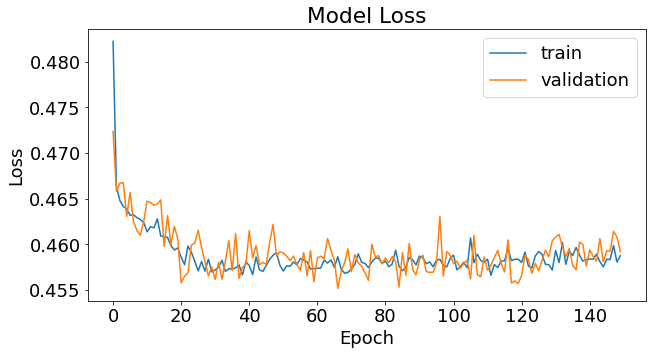

In [ ]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions = model.predict(X_test_t)
# print(accuracy_score(predictions, y_test))
classes = np.argmax(predictions, axis=1)

In [ ]:
# predictions[3]
# classes[3]
print(accuracy_score(classes, y_test))

0.8126
